In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# MNIST 데이터셋 로드

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 데이터 전처리: 데이터 차원을 맞추고 정규화

x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255.0 # MNIST 이미지 픽셀 값이 0~255까지의 정수이므로 0~1값으로 변환하기 위해 정규화 진행

In [ ]:
y_train = tf.one_hot(y_train, depth = 10) # y_train을 원-핫 인코딩으로 변환
y_test = tf.one_hot(y_test, depth = 10) # 훈련 데이터와 테스트 데이터의 레이블이 범주형이며 연속적이지 않기 때문에,
                                        # one-hot 인코딩을 통해 범주형 데이터를 모델에 포함시킨다.

In [ ]:
# Fully Connected 모델 정의

model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (28 * 28, ))) # 첫번째 완전 연결 층
model.add(layers.Dense(64, activation = 'relu')) # 두번째 완전 연결 층
model.add(layers.Dense(10, activation = 'softmax')) # 출력 층

In [ ]:
# 모델 컴파일

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 모델 훈련
# epochs는 반복학습 횟수, bacth_size는 1epoch에 모든 데이터를 한번에 돌리는게 아니라, batch로 나누어 돌린다.
# 훈련 데이터의 20%(validation_split = 0.2)를 검증 데이터로 사용

model_train = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8468 - loss: 0.5415 - val_accuracy: 0.9533 - val_loss: 0.1594
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9601 - loss: 0.1341 - val_accuracy: 0.9643 - val_loss: 0.1217
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9733 - loss: 0.0885 - val_accuracy: 0.9701 - val_loss: 0.1015
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9797 - loss: 0.0681 - val_accuracy: 0.9712 - val_loss: 0.0947
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9851 - loss: 0.0493 - val_accuracy: 0.9732 - val_loss: 0.0958


In [ ]:
# 모델 평가

train_loss, train_acc = model.evaluate(x_train, y_train) # 훈련 정확도
print('훈련 정확도:', round(train_acc, 3))
test_loss, test_acc = model.evaluate(x_test, y_test) # 테스트 정확도
print('테스트 정확도:', round(test_acc, 3))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0348
훈련 정확도: 0.987
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0912
테스트 정확도: 0.976


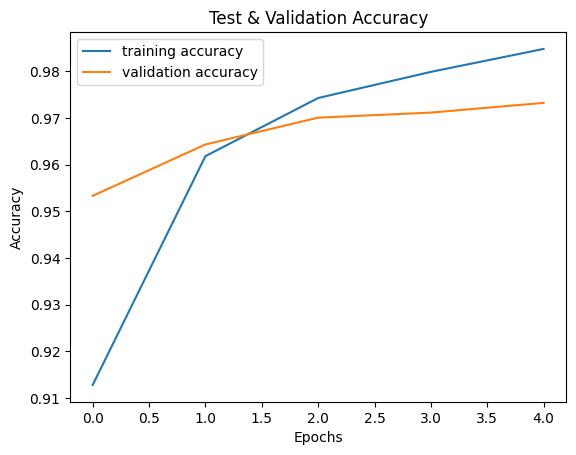

In [ ]:
# 정확도 로그 파일

plt.plot(model_train.history['accuracy'], label = 'training accuracy')
plt.plot(model_train.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test & Validation Accuracy')
plt.savefig('accuracy_plot.png')
plt.show()